# Hard y Soft SVM

Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Definimos función para visualizar los resultados

In [2]:
def plot_svm(X, y, model):
    plt.figure(figsize=(10, 6))

    # Graficamos los puntos
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # Obtenemos los límites del gráfico
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Creamos una malla para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # Graficamos la frontera de decisión y los márgenes
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # Graficamos los vectores de soporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')

    plt.title('SVM')
    plt.show()

Creamos un dataset sintético

In [3]:
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6, cluster_std=1.5)

Normalizamos

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Realizamos holdout

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## HARD SVM
Creamos y entrenamos el modelo

In [10]:
svm_hard = SVC(kernel='linear', C=10000000) #el echo que C es muy grande hace que el margen sea muy pequeño
svm_hard.fit(X_train, y_train)

SVC(C=10000000, kernel='linear')

Graficamos los resultados

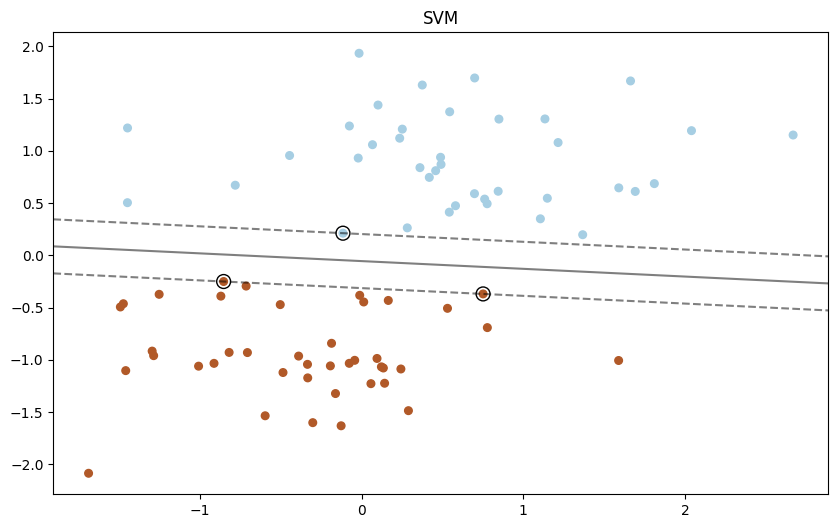

In [7]:
plot_svm(X_train, y_train, svm_hard)

## SOFT SVM

In [8]:
svm_soft = SVC(kernel='linear', C=1.0)
svm_soft.fit(X_train, y_train)

SVC(kernel='linear')

Graficamos los resultados

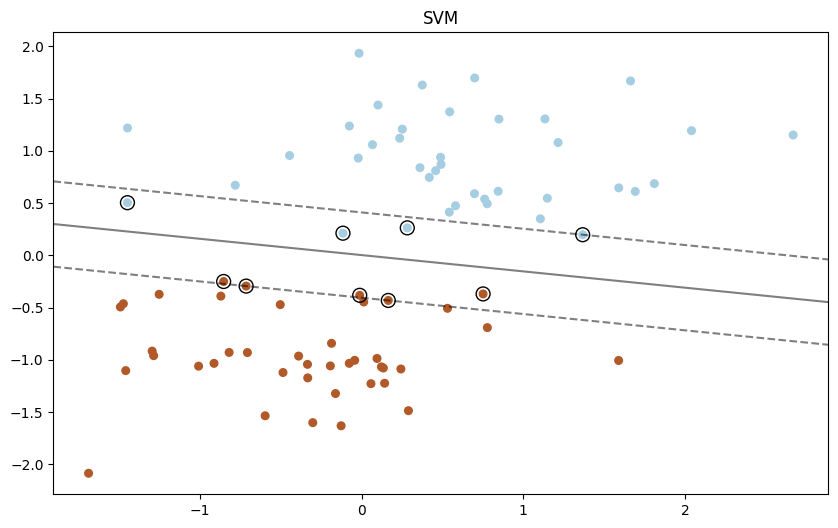

In [9]:
plot_svm(X_train, y_train, svm_soft)